# Factors Affecting Student Performance

## Importing APIs

In [1]:
# Imports
import os
import pandas as pd
import numpy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Access Data

In [2]:
# Get the file path
file_path = os.path.join(os.getcwd(), 'data', 'StudentPerformanceFactors.csv')

# Load the CSV file into a DataFrame
student_performance_df = pd.read_csv(file_path)

## Add Column (Percent_Improvement)

In [3]:
# Calculate Percent Improvement and add it to the DataFrame
student_performance_df['Percent_Improvement'] = (
    (student_performance_df['Exam_Score'] - student_performance_df['Previous_Scores']) 
    / student_performance_df['Previous_Scores']
) * 100

## Dataset Summary

### Head

In [4]:
# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(student_performance_df.head())

First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions  ... Teacher_Quality

In [5]:
# Display the column headers
print("\nColumn headers:")
columns = student_performance_df.columns.tolist()
print(columns)


Column headers:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score', 'Percent_Improvement']


### Total Number of Rows and Columns

In [6]:
# Display the total number of rows
print("\nTotal number of rows:", len(student_performance_df))

# Display the total number of columns
print("Total number of columns:", len(student_performance_df.columns))


Total number of rows: 6607
Total number of columns: 21


### Null Values Per Column

In [7]:
# Count null values in each column
null_counts = student_performance_df.isnull().sum()

# Display the result
null_counts = null_counts.reset_index()  # Convert Series to DataFrame
null_counts.columns = ['Column', 'Null Count']  # Rename columns for clarity
null_counts

,Column,Null Count
0,Hours_Studied,0
1,Attendance,0
2,Parental_Involvement,0
3,Access_to_Resources,0
4,Extracurricular_Activities,0
5,Sleep_Hours,0
6,Previous_Scores,0
7,Motivation_Level,0
8,Internet_Access,0
9,Tutoring_Sessions,0


### Variable Type Per Column

In [8]:
# Get the variable types for each column
variable_types = student_performance_df.dtypes

# Display the variable types
print("Variable Type Per Column:\n", variable_types)

Variable Type Per Column:
 Hours_Studied                   int64
Attendance                      int64
Parental_Involvement           object
Access_to_Resources            object
Extracurricular_Activities     object
Sleep_Hours                     int64
Previous_Scores                 int64
Motivation_Level               object
Internet_Access                object
Tutoring_Sessions               int64
Family_Income                  object
Teacher_Quality                object
School_Type                    object
Peer_Influence                 object
Physical_Activity               int64
Learning_Disabilities          object
Parental_Education_Level       object
Distance_from_Home             object
Gender                         object
Exam_Score                      int64
Percent_Improvement           float64
dtype: object


### Range/Categories Per Column

In [9]:
# Initialize a dictionary to hold the range or categories
range_categories = {}

# Loop through each column in the DataFrame
for column in student_performance_df.columns:
    if student_performance_df[column].dtype == 'int64':
        # If the column is of type int64, calculate the range
        range_min = student_performance_df[column].min()
        range_max = student_performance_df[column].max()
        range_categories[column] = f"Range: {range_min} to {range_max}"
    elif student_performance_df[column].dtype == 'object':
        # If the column is of type object, get unique values
        unique_values = student_performance_df[column].unique()
        range_categories[column] = f"Categories: {', '.join(map(str, unique_values))}"

# Print the range or categories for each column
for column, summary in range_categories.items():
    print(f"{column}: {summary}")


Hours_Studied: Range: 1 to 44
Attendance: Range: 60 to 100
Parental_Involvement: Categories: Low, Medium, High
Access_to_Resources: Categories: High, Medium, Low
Extracurricular_Activities: Categories: No, Yes
Sleep_Hours: Range: 4 to 10
Previous_Scores: Range: 50 to 100
Motivation_Level: Categories: Low, Medium, High
Internet_Access: Categories: Yes, No
Tutoring_Sessions: Range: 0 to 8
Family_Income: Categories: Low, Medium, High
Teacher_Quality: Categories: Medium, High, Low, nan
School_Type: Categories: Public, Private
Peer_Influence: Categories: Positive, Negative, Neutral
Physical_Activity: Range: 0 to 6
Learning_Disabilities: Categories: No, Yes
Parental_Education_Level: Categories: High School, College, Postgraduate, nan
Distance_from_Home: Categories: Near, Moderate, Far, nan
Gender: Categories: Male, Female
Exam_Score: Range: 55 to 101


## Statistical Analysis

### Numerical Columns

ValueError: num must be an integer with 1 <= num <= 49, not 50

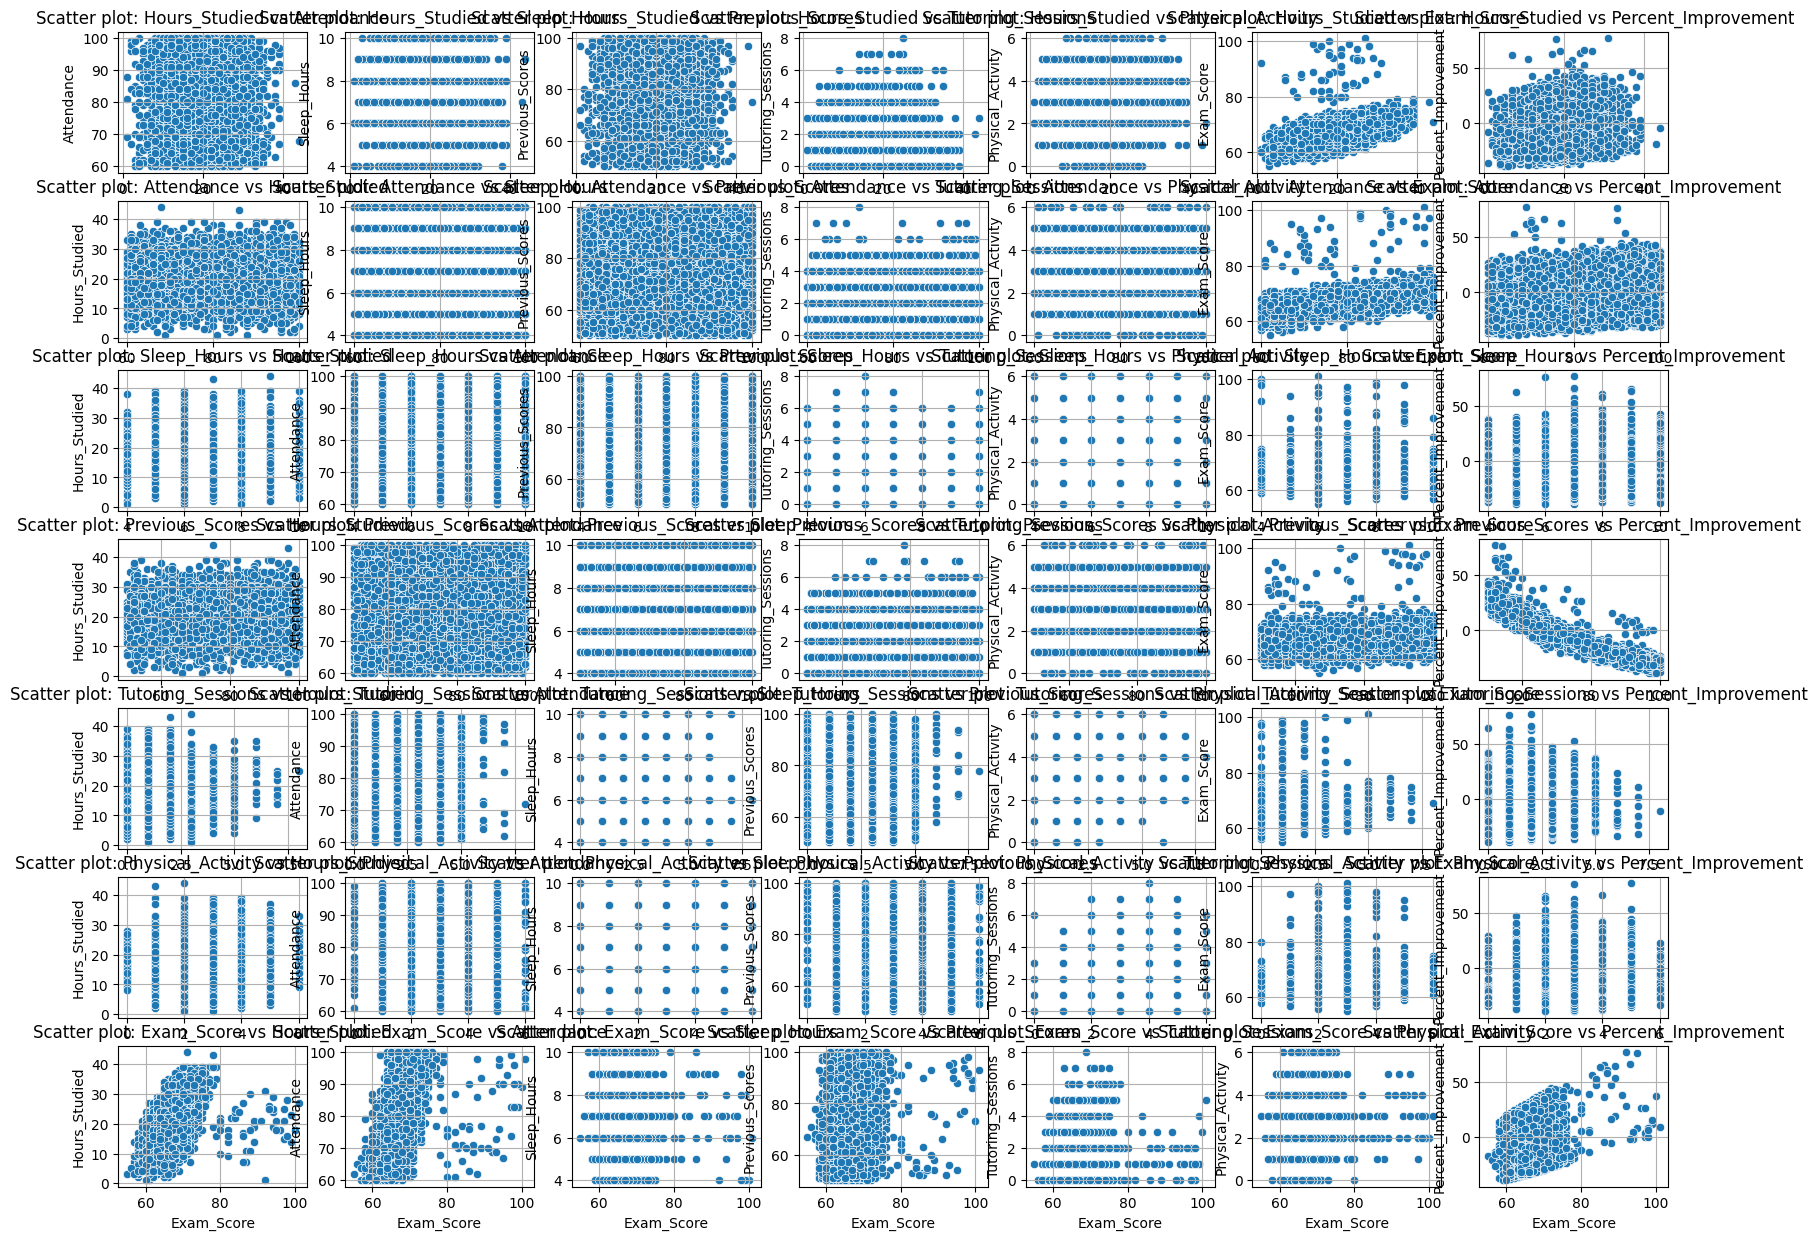

In [10]:
def generate_scatter_plots(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Check if there are enough numerical columns for scatter plots
    if len(numerical_columns) < 2:
        print("Not enough numerical columns for scatter plots.")
        return

    plt.figure(figsize=(20, 15))
    
    correlation_data = []  # List to hold correlation info
    
    # Generate scatter plots for numerical variables
    plot_index = 1
    for i, col1 in enumerate(numerical_columns):
        for j, col2 in enumerate(numerical_columns):
            if col1 != col2:
                plt.subplot(len(numerical_columns) - 1, len(numerical_columns) - 1, plot_index)
                sns.scatterplot(data=df, x=col1, y=col2)
                plt.title(f'Scatter plot: {col1} vs {col2}')
                correlation = df[col1].corr(df[col2])
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.grid()
                
                # Store correlation information
                correlation_data.append(f'Correlation: {correlation:.2f} between {col1} and {col2}')

                plot_index += 1

    # Adjust the layout for better spacing
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.tight_layout()
    plt.show()

    # Print the correlation coefficients and variable names
    print("Correlation Coefficients:")
    for correlation_info in correlation_data:
        print(correlation_info)

# Call the function to generate scatter plots
generate_scatter_plots(student_performance_df)

In [12]:
import pandas as pd

def print_correlation_coefficients(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Check if there are enough numerical columns for correlation
    if len(numerical_columns) < 2:
        print("Not enough numerical columns for correlation calculations.")
        return

    correlation_data = []  # List to hold correlation info
    
    # Calculate correlation coefficients
    for i, col1 in enumerate(numerical_columns):
        for j, col2 in enumerate(numerical_columns):
            if col1 != col2:
                correlation = df[col1].corr(df[col2])
                correlation_data.append((col1, col2, correlation))  # Store as tuple

    # Print the correlation coefficients
    print("Correlation Coefficients:")
    for col1, col2, correlation in correlation_data:
        print(f'Correlation between {col1} and {col2}: {correlation:.2f}')

# Print correlation coefficients
print_correlation_coefficients(student_performance_df)


Correlation Coefficients:
Correlation between Hours_Studied and Attendance: -0.01
Correlation between Hours_Studied and Sleep_Hours: 0.01
Correlation between Hours_Studied and Previous_Scores: 0.02
Correlation between Hours_Studied and Tutoring_Sessions: -0.01
Correlation between Hours_Studied and Physical_Activity: 0.00
Correlation between Hours_Studied and Exam_Score: 0.45
Correlation between Hours_Studied and Percent_Improvement: 0.10
Correlation between Attendance and Hours_Studied: -0.01
Correlation between Attendance and Sleep_Hours: -0.02
Correlation between Attendance and Previous_Scores: -0.02
Correlation between Attendance and Tutoring_Sessions: 0.01
Correlation between Attendance and Physical_Activity: -0.02
Correlation between Attendance and Exam_Score: 0.58
Correlation between Attendance and Percent_Improvement: 0.19
Correlation between Sleep_Hours and Hours_Studied: 0.01
Correlation between Sleep_Hours and Attendance: -0.02
Correlation between Sleep_Hours and Previous_Sco

### Categorical Columns

In [13]:
from scipy import stats  # Import scipy for statistical tests

# Function to perform statistical analysis
def statistical_analysis(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    results = {}
    
    for num_col in numerical_columns:
        results[num_col] = {}
        
        for cat_col in categorical_columns:
            categories = df[cat_col].unique()
            
            if len(categories) == 2:  # Two categories - t-test
                group1 = df[df[cat_col] == categories[0]][num_col]
                group2 = df[df[cat_col] == categories[1]][num_col]
                t_stat, p_value = stats.ttest_ind(group1, group2)
                results[num_col][cat_col] = {
                    'Test': 'T-Test',
                    't_statistic': t_stat,
                    'p_value': p_value
                }
                
            elif len(categories) > 2:  # Three or more categories - ANOVA
                groups = [df[df[cat_col] == category][num_col] for category in categories]
                f_stat, p_value = stats.f_oneway(*groups)
                results[num_col][cat_col] = {
                    'Test': 'ANOVA',
                    'f_statistic': f_stat,
                    'p_value': p_value
                }
    
    return results

# Perform statistical analysis on the student performance DataFrame
statistical_results = statistical_analysis(student_performance_df)

# Print the results
for num_var, tests in statistical_results.items():
    print(f"\nNumerical Variable: {num_var}")
    for cat_var, test_info in tests.items():
        print(f"  Categorical Variable: {cat_var}")
        print(f"    Test: {test_info['Test']}")
        if test_info['Test'] == 'T-Test':
            print(f"    t-statistic: {test_info['t_statistic']:.4f}, p-value: {test_info['p_value']:.4f}")
            if test_info['p_value'] < 0.05:
                print("    Result: Statistically significant difference")
            else:
                print("    Result: No statistically significant difference")
        elif test_info['Test'] == 'ANOVA':
            print(f"    F-statistic: {test_info['f_statistic']:.4f}, p-value: {test_info['p_value']:.4f}")
            if test_info['p_value'] < 0.05:
                print("    Result: Statistically significant difference")
            else:
                print("    Result: No statistically significant difference")

/Users/elenanunez/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):



Numerical Variable: Hours_Studied
  Categorical Variable: Parental_Involvement
    Test: ANOVA
    F-statistic: 0.8599, p-value: 0.4232
    Result: No statistically significant difference
  Categorical Variable: Access_to_Resources
    Test: ANOVA
    F-statistic: 0.6265, p-value: 0.5345
    Result: No statistically significant difference
  Categorical Variable: Extracurricular_Activities
    Test: T-Test
    t-statistic: 0.4890, p-value: 0.6249
    Result: No statistically significant difference
  Categorical Variable: Motivation_Level
    Test: ANOVA
    F-statistic: 1.6563, p-value: 0.1909
    Result: No statistically significant difference
  Categorical Variable: Internet_Access
    Test: T-Test
    t-statistic: 0.4095, p-value: 0.6822
    Result: No statistically significant difference
  Categorical Variable: Family_Income
    Test: ANOVA
    F-statistic: 0.3739, p-value: 0.6881
    Result: No statistically significant difference
  Categorical Variable: Teacher_Quality
    Test: 

### Statistically Significant Results and Correlations Greater than .1

In [14]:
import pandas as pd

def print_significant_results(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    print("Statistically Significant Results:")
    for num_col in numerical_columns:
        for cat_col in categorical_columns:
            categories = df[cat_col].unique()

            if len(categories) == 2:  # T-Test
                group1 = df[df[cat_col] == categories[0]][num_col]
                group2 = df[df[cat_col] == categories[1]][num_col]
                t_stat, p_value = stats.ttest_ind(group1, group2)
                if p_value < 0.05:  # Check for significance
                    print(f"{num_col} vs {cat_col}: T-Test - t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

            elif len(categories) > 2:  # ANOVA
                groups = [df[df[cat_col] == category][num_col] for category in categories]
                f_stat, p_value = stats.f_oneway(*groups)
                if p_value < 0.05:  # Check for significance
                    print(f"{num_col} vs {cat_col}: ANOVA - F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

def print_significant_correlations(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_data = []  # List to hold correlation info

    # Calculate correlation coefficients
    for i, col1 in enumerate(numerical_columns):
        for j, col2 in enumerate(numerical_columns):
            if col1 != col2:
                correlation = df[col1].corr(df[col2])
                if abs(correlation) > 0.1:  # Check for correlation > 0.1
                    correlation_data.append((col1, col2, correlation))

    print("\nSignificant Correlation Coefficients (|r| > 0.1):")
    for col1, col2, correlation in correlation_data:
        print(f'Correlation between {col1} and {col2}: {correlation:.2f}')

# Call the functions to print the results
print_significant_results(student_performance_df)
print_significant_correlations(student_performance_df)


Statistically Significant Results:


/Users/elenanunez/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


Physical_Activity vs Access_to_Resources: ANOVA - F-statistic: 5.2188, p-value: 0.0054
Physical_Activity vs Family_Income: ANOVA - F-statistic: 6.7234, p-value: 0.0012
Exam_Score vs Parental_Involvement: ANOVA - F-statistic: 84.4877, p-value: 0.0000
Exam_Score vs Access_to_Resources: ANOVA - F-statistic: 98.0044, p-value: 0.0000
Exam_Score vs Extracurricular_Activities: T-Test - t-statistic: -5.2433, p-value: 0.0000
Exam_Score vs Motivation_Level: ANOVA - F-statistic: 25.7168, p-value: 0.0000
Exam_Score vs Internet_Access: T-Test - t-statistic: 4.1890, p-value: 0.0000
Exam_Score vs Family_Income: ANOVA - F-statistic: 29.7939, p-value: 0.0000
Exam_Score vs Peer_Influence: ANOVA - F-statistic: 34.0521, p-value: 0.0000
Exam_Score vs Learning_Disabilities: T-Test - t-statistic: 6.9385, p-value: 0.0000
Percent_Improvement vs Parental_Involvement: ANOVA - F-statistic: 13.6035, p-value: 0.0000
Percent_Improvement vs Motivation_Level: ANOVA - F-statistic: 3.1769, p-value: 0.0418
Percent_Improv